# Modelo de Ising 1D

In [8]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
%matplotlib inline  
import timeit

tic=timeit.default_timer()





#DEFINIR A CONFIGURAÇÃO INICIAL
def Initial_state(Nspins):
    rede = 2*np.random.randint(2,size =Nspins) - 1
    return rede
    
#DEFINIR METROPOLIS MONTE CARLO PASSOS
def memc(rede, beta):
    for i in range(Nspins):
        a = np.random.randint(Nspins)
        s = rede[a]
        nb = rede[(a+1)%Nspins] + rede[(a-1)%Nspins] 
        dE = 2*nb*s
        
        if dE< 0:
            s*=-1
        elif np.random.random()< np.exp(-dE*beta):
            s*=-1
        rede[a] = s
        
    return rede


#DEFINIR ENERGIA
def energia(rede):
    '''Energia de uma dada configuração'''
    energy = 0
    for i in range(len(rede)):
        S = rede[i]
        nb = rede[(i+1)%Nspins] +rede[(i-1)%Nspins] 
        energy += -nb*S
    return energy/4
    
    
    
 #DEFINIR MAGNETIZAÇÃO   
def Mag(rede):
    '''Magnetização de uma dada Rede'''
    mag = np.sum(rede)
    return mag

#DEFINIR ENTROPIA  (DELTA S>0 )
def Entropy(T):
    DS =np.trapz(C/T, T)
    return DS

#Aqui estao os input do programa. O Numero de pontos e o tamanho da rede sao escolhidos ao rodar o programa


nt = int(input('Escolha o Número de pontos'))
Nspins =  int(input('Escolha o Tamanho da rede'))    #tamanho da rede
steps = Nspins*10000    #quantidade de iterações de monte carlo


#DEFINIR VETORES DAS VARIAVEIS:
T       = np.linspace(0.1, 3.28, nt);  # Intervalo de Temperatura
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)  #observaveis
n1, n2  = 1.0/(steps*Nspins), 1.0/(steps*steps*Nspins) 


for ii in range(nt):
    E1 = M1 = E2 = M2 = 0
    rede = Initial_state(Nspins)
    beta=1.0/T[ii]; beta2=beta*beta;
    
    
    for i in range(steps):
        memc(rede, beta)        #Monte Carlo Steps  
        Ene = energia(rede)     # Calcula a energia
        mag = Mag(rede)        # Calcula a magnetização

        E1 = E1 + Ene
        M1 = M1 + mag
        M2 = M2 + mag*mag      #Mag*Mag
        E2 = E2 + Ene*Ene      #Ene*Ene

    E[ii] = n1*E1
    M[ii] = n1*M1
    C[ii] = (n1*E2 - n2*E1*E1)*beta2
    X[ii] = (n1*M2 - n2*M1*M1)*beta

    


    
print('Delta S =',Entropy(T))    
 #Isto é somento para ver o tempo de processamento do programa
toc = timeit.default_timer()
print(toc-tic,"segundos")



Escolha o Número de pontos30
Escolha o Tamanho da rede5
Delta S = 0.13056778183580778
92.24705249999897 segundos


## Plot das Figuras

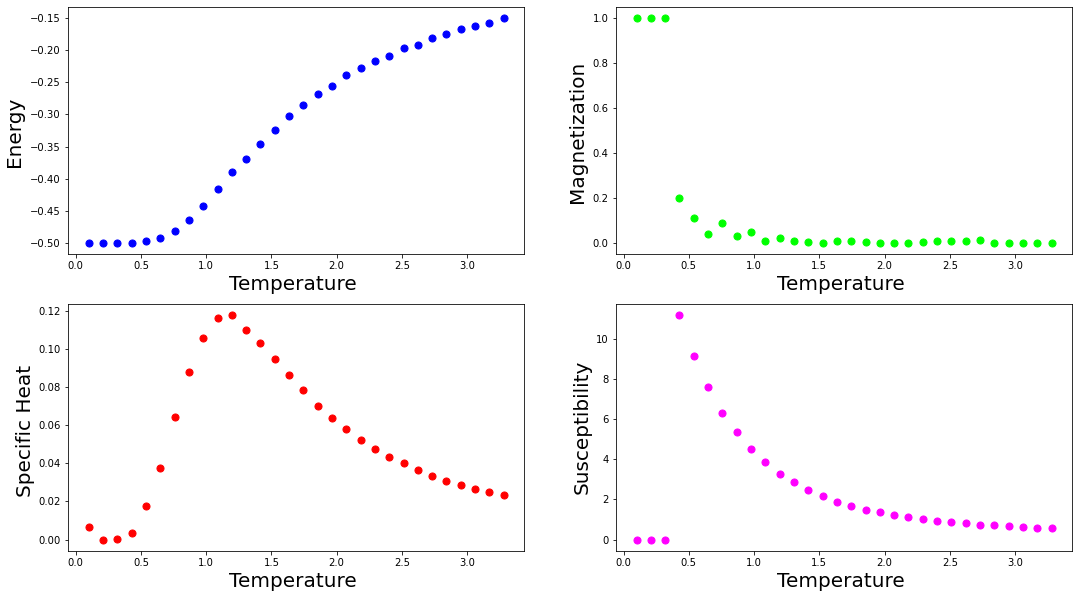

In [9]:
f = plt.figure(figsize=(18, 10)); # plot as figuras

sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='blue')
plt.xlabel("Temperature ", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='lime')
plt.xlabel("Temperature ", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='red')
plt.xlabel("Temperature ", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

sp =  f.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='magenta')
plt.xlabel("Temperature ", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');

# Modelo de Ising 2-D

In [6]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
%matplotlib inline  
import timeit

tic=timeit.default_timer()





#DEFINIR A CONFIGURAÇÃO INICIAL
def Initial_state(Nspins):
    rede = 2*np.random.randint(2,size =(Nspins,Nspins)) - 1
    return rede
    
#DEFINIR METROPOLIS MONTE CARLO PASSOS
def memc(rede, beta):
    for j in range(Nspins):
        for i in range(Nspins):
            a = np.random.randint(Nspins)
            b = np.random.randint(Nspins)
            s = rede[a,b]
            nb = rede[(a+1)%Nspins,b] + rede[(a-1)%Nspins,b]+ rede[a,(b+1)%Nspins] + rede[a,(b-1)%Nspins] 
            dE = 2*nb*s
        
            if dE< 0:
                s*=-1
            elif np.random.random()< np.exp(-dE*beta):
                s*=-1
            rede[a,b] = s
        
    return rede


#DEFINIR ENERGIA
def energia(rede):
    '''Energia de uma dada configuração'''
    energy = 0
    for j in range(len(rede)):
        
        for i in range(len(rede)):
            S = rede[i,j]
            nb = nb = rede[(i+1)%Nspins, j] + rede[i,(j+1)%Nspins] + rede[(i-1)%Nspins, j] + rede[i,(j-1)%Nspins]
            energy += -nb*S
    return energy/4
    
    
    
 #DEFINIR MAGNETIZAÇÃO   
def Mag(rede):
    '''Magnetização de uma dada Rede'''
    mag = np.sum(rede)
    return mag



#DEFINIR ENTROPIA  (DELTA S>0 )
def Entropy(T):
    DS =np.trapz(C/T, T)
    return DS

#DEFINIR VETORES DAS VARIAVEIS:

nt = int(input('Escolha o Número de pontos'))
Nspins =  int(input('Escolha o Tamanho da rede'))    #tamanho da rede
steps = Nspins*10000


T       = np.linspace(0.4, 3.28, nt);  #Temperatura
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)  #observaveis
n1, n2  = 1.0/(steps*Nspins*Nspins), 1.0/(steps*steps*Nspins*Nspins) 


for ii in range(nt):
    E1 = M1 = E2 = M2 = 0
    rede = Initial_state(Nspins)
    beta=1.0/T[ii]; beta2=beta*beta;
    
    
    for i in range(steps):
        memc(rede, beta)        #Monte Carlo Steps  
        Ene = energia(rede)     # Calcula a energia
        mag = Mag(rede)        # Calcula a magnetização

        E1 = E1 + Ene
        M1 = M1 + mag
        M2 = M2 + mag*mag      #Mag*Mag
        E2 = E2 + Ene*Ene      #Ene*Ene

    E[ii] = n1*E1
    M[ii] = n1*M1
    C[ii] = (n1*E2 - n2*E1*E1)*beta2
    X[ii] = (n1*M2 - n2*M1*M1)*beta
  





 #Isto é somento para ver o tempo de processamento do programa
print('Delta S =',Entropy(T)) 
toc = timeit.default_timer()
print(toc-tic,"segundos")

Escolha o Número de pontos30
Escolha o Tamanho da rede5
Delta S = 0.13263489596792644
561.6210145999976 segundos


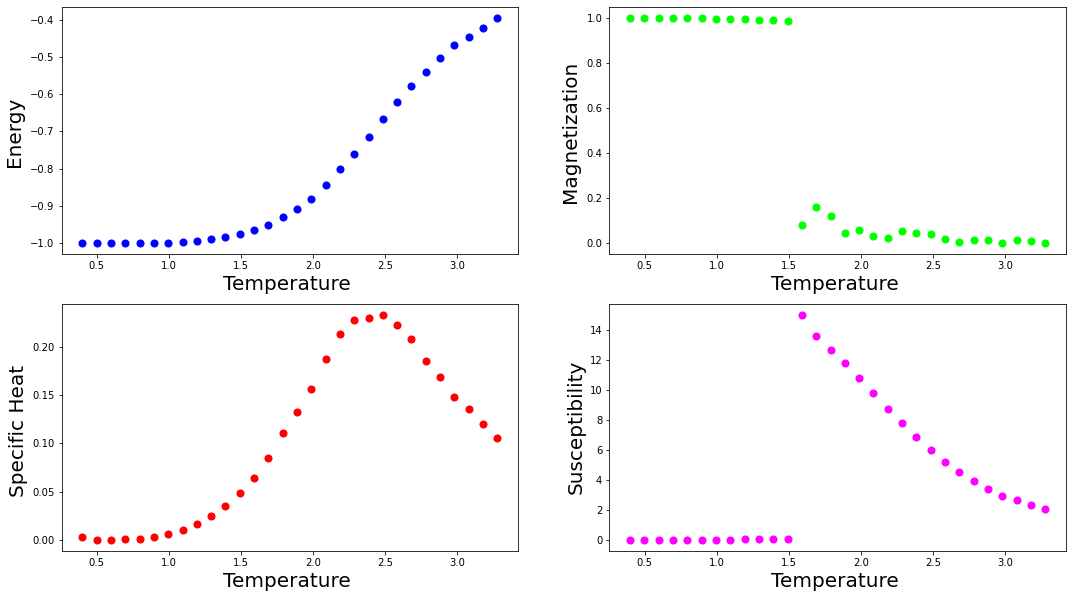

In [7]:
f2 = plt.figure(figsize=(18, 10)); # plot the calculated values    

sp =  f2.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='blue')
plt.xlabel("Temperature ", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

sp =  f2.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='lime')
plt.xlabel("Temperature ", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

sp =  f2.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='red')
plt.xlabel("Temperature ", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

sp =  f2.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='magenta')
plt.xlabel("Temperature ", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');

# Snapshots da Rede

Precisamos criar um biblioteca de funções dentro do python para executar a simulação.
A célula abaixo serve para isso.

In [3]:
%matplotlib inline
# Simulação para o modelo de Ising

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

class Ising():
    ''' Simulando O modelo de Ising '''    
    ## monte carlo moves
    def mcmove(self, rede, N, beta):
        ''' Este modulo executa o Metropolis Monte Carlo'''
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(0, N)
                    b = np.random.randint(0, N)
                    s =  rede[a, b]
                    nb = rede[(a+1)%N,b] + rede[a,(b+1)%N] + rede[(a-1)%N,b] + rede[a,(b-1)%N]
                    cost = 2*s*nb
                    if cost < 0:
                        s *= -1
                    elif np.random.random() < np.exp(-cost*beta):
                        s *= -1
                    rede[a, b] = s
        return rede
    
    def simulate(self):   
        ''' Este modulo simula o modelo de Ising'''
        N, temp     = 64, .4        # Inicia a REDE
        rede = 2*np.random.randint(2, size=(N,N))-1
        f = plt.figure(figsize=(15, 15), dpi=80);    
        self.configPlot(f,rede, 0, N, 1);
        
        msrmnt = 1001
        for i in range(msrmnt):
            self.mcmove(rede, N, 1.0/temp)
            
            #ESTAS LINHAS SÃO OS MOMENTOS DO SNAPSHOT, BASTA TROCAR O i OU ACRESCENTAR MAIS LINHAS CASO QUEIRA MAIS.
            if i == 1:       self.configPlot(f, rede, i, N, 2);
            if i == 4:       self.configPlot(f, rede, i, N, 3);
            if i == 32:      self.configPlot(f, rede, i, N, 4);
            if i == 100:     self.configPlot(f, rede, i, N, 5);
            if i == 1000:    self.configPlot(f, rede, i, N, 6);
                 
                    
    def configPlot(self, f, rede, i, N, n_):
        ''' Este modulo plot a configuração '''
        X, Y = np.meshgrid(range(N), range(N))
        #ESTE COMANDO ESTABELECE QUANTAS FIGURAS PODEM APARECER 3LINHAS 3 COLUNAS
        sp =  f.add_subplot(3, 3, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, rede, cmap=plt.cm.PiYG);   # existe um documentação para escolher a cor
        plt.title('Time=%d'%i); plt.axis('tight')    
    plt.show()

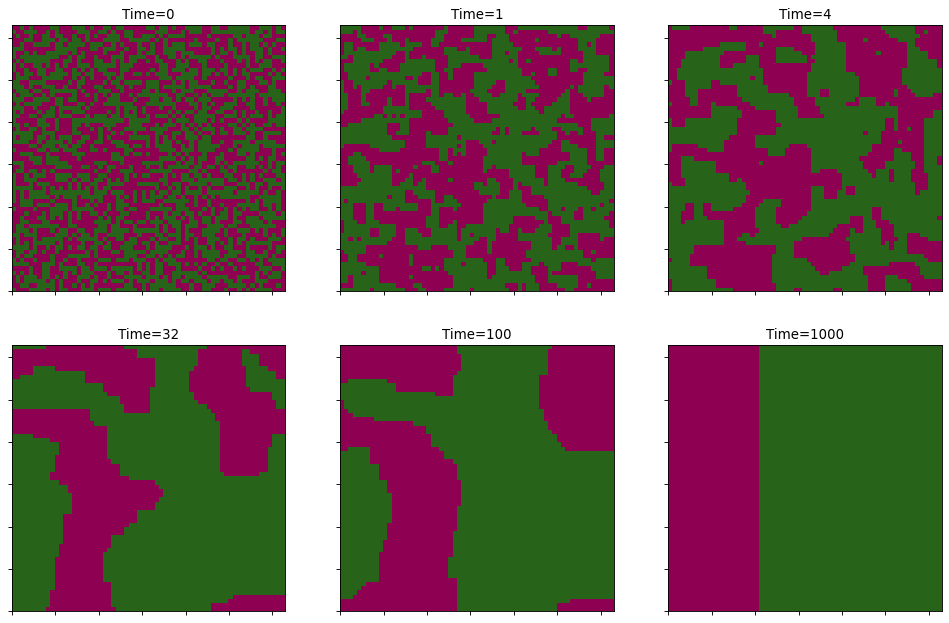

In [4]:
rm = Ising()  # ESTA LINHA INICIA O MODULO
rm.simulate()  #ESTA UTILIZA O MODULO E MANDA SIMULAR